In [1]:
#Depencies 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Data files to load
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data 

mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#Read the study results

study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the above data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview

combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.

num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID


array(['g989'], dtype=object)

In [11]:
# Get all the data for the duplicate mouse ID. 

dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumour Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumour Volume":mean, 
                            "Median Tumour Volume":median, 
                           "Tumour Volume Variance":var, 
                           "Tumour Volume Std. Dev.":std, 
                           "Tumour Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat


,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen 
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_agg


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

In [17]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 

mice_count = clean_df["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

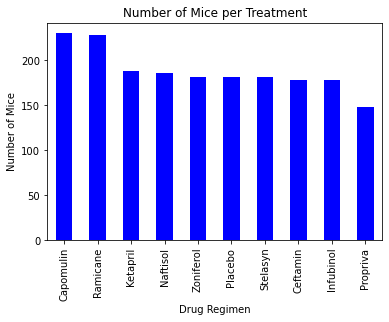

In [19]:
# Create a Pandas bar plot based off of the group series from before and label the title

plot_pandas = mice_count.plot.bar(color='b')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


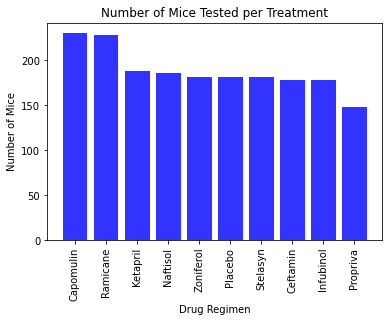

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


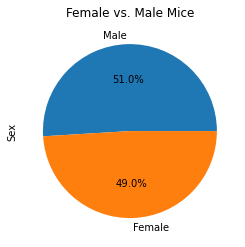

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


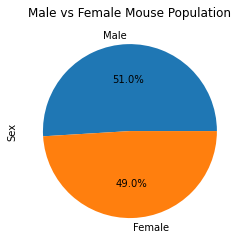

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]


In [28]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [33]:
Capomulin_tumours = Capomulin_merge["Tumour Volume (mm3)"]

quartiles =Capomulin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumours: {lowerq}")
print(f"The upper quartile of Capomulin tumours: {upperq}")
print(f"The interquartile range of Capomulin tumours: {iqr}")
print(f"The median of Capomulin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumours: 32.37735684
The upper quartile of Capomulin tumours: 40.1592203
The interquartile range of Capomulin tumours: 7.781863460000004
The median of Capomulin tumours: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [35]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumours = Ramicane_merge["Tumour Volume (mm3)"]

quartiles =Ramicane_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumours is: {lowerq}")
print(f"The upper quartile of Ramicane tumours is: {upperq}")
print(f"The interquartile range of Ramicane tumours is: {iqr}")
print(f"The median of Ramicane tumours is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumours is: 31.56046955
The upper quartile of Ramicane tumours is: 40.65900627
The interquartile range of Ramicane tumours is: 9.098536719999998
The median of Ramicane tumours is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [36]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [37]:
Infubinol_tumours = Infubinol_merge["Tumour Volume (mm3)"]

quartiles =Infubinol_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumours is: {lowerq}")
print(f"The upper quartile of Infubinol tumours is: {upperq}")
print(f"The interquartile range of Infubinol tumours is: {iqr}")
print(f"The median of Infubinol tumours is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")


The lower quartile of Infubinol tumours is: 54.04860769
The upper quartile of Infubinol tumours is: 65.52574285
The interquartile range of Infubinol tumours is: 11.477135160000003
The median of Infubinol tumours is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [38]:
# Ceftamin

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [39]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumours = Ceftamin_merge["Tumour Volume (mm3)"]

quartiles = Ceftamin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [47]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumours, Ramicane_tumours, Infubinol_tumours, Ceftamin_tumours]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = data_to_plot.subplots()
ax1.set_title('Tumour Volume at Selected Mouse')
ax1.set_ylabel('Final Tumour Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

In [48]:
# Calculate the final tumour volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumour Volume (mm3)", lambda x: x.iloc[-1]))

#Reshape dataframe

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)


Capomulin
Ramicane
Infubinol
Ceftamin


In [50]:
# Put treatments into a list for loop (and later for plot labels)   
# Create empty list to fill with tumour vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumour volumes add subset 
# Determine outliers using upper and lower bounds

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [53]:
boxplot_list = []
for drug in boxplot_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

fig = boxplot_list.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumour Volume")
plt.title("Tumour Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

Text(0, 0.5, 'Tumour Volume (mm3)')

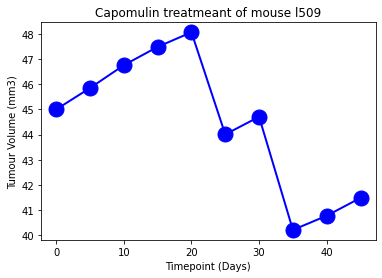

In [54]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumour Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumour Volume (mm3)')


Text(0, 0.5, 'Averag Tumour Volume (mm3)')

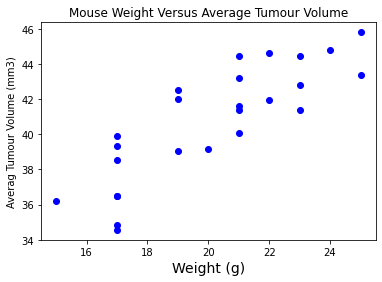

In [56]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumour Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumour Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumour Volume (mm3)')


In [57]:
# Calculate the correlation and regression model for mouse weight and average tumour volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumour Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumour volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumour volume is 0.84


The r-squared is: 0.709


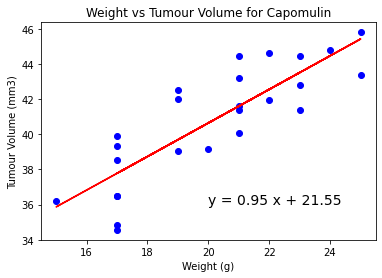

In [59]:
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumour Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumour Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Weight vs Tumour Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()